<a href="https://colab.research.google.com/github/ajaythakur3369/CODSOFT/blob/main/Task_4_Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Sales Prediction using Python**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - CodSoft**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CODSOFT/blob/main/Task_4_Sales_Prediction_using_Python.ipynb)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1cd6SyaI779DyQqj6ADGctMUZFpmo7qEK)**

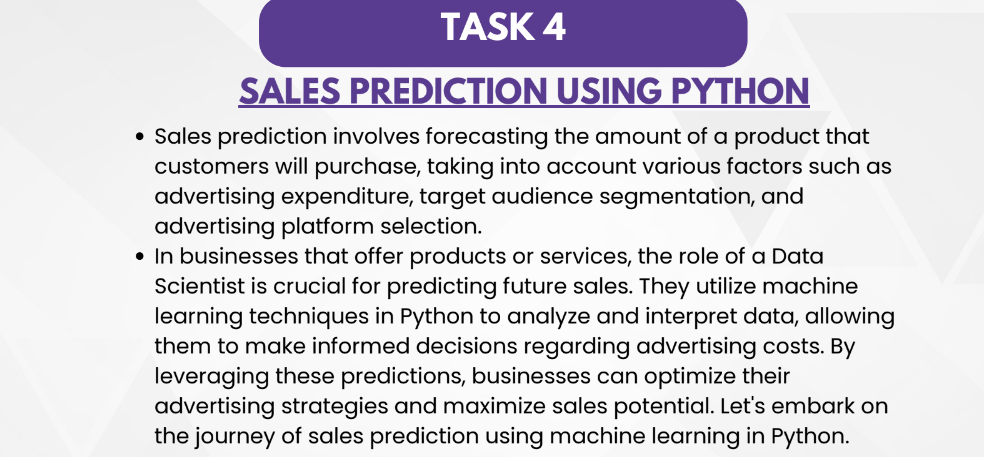

# **Problem Statement -**

*   Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

*   In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.


# **Let's Begin !**

### **Import Libraries**

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Import the dataset**

In [ ]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/folders/Task_4_CodSoft_File.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### **Data Cleaning**

**Check for missing values and handle them if necessary. In this dataset, there might not be any missing values, but it's good practice to check.**

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### **Exploratory Data Analysis (EDA)**

**Perform EDA to understand the data's distribution, relationships, and statistics. Use various visualizations to gain insights:**

In [ ]:
# Summary statistics
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


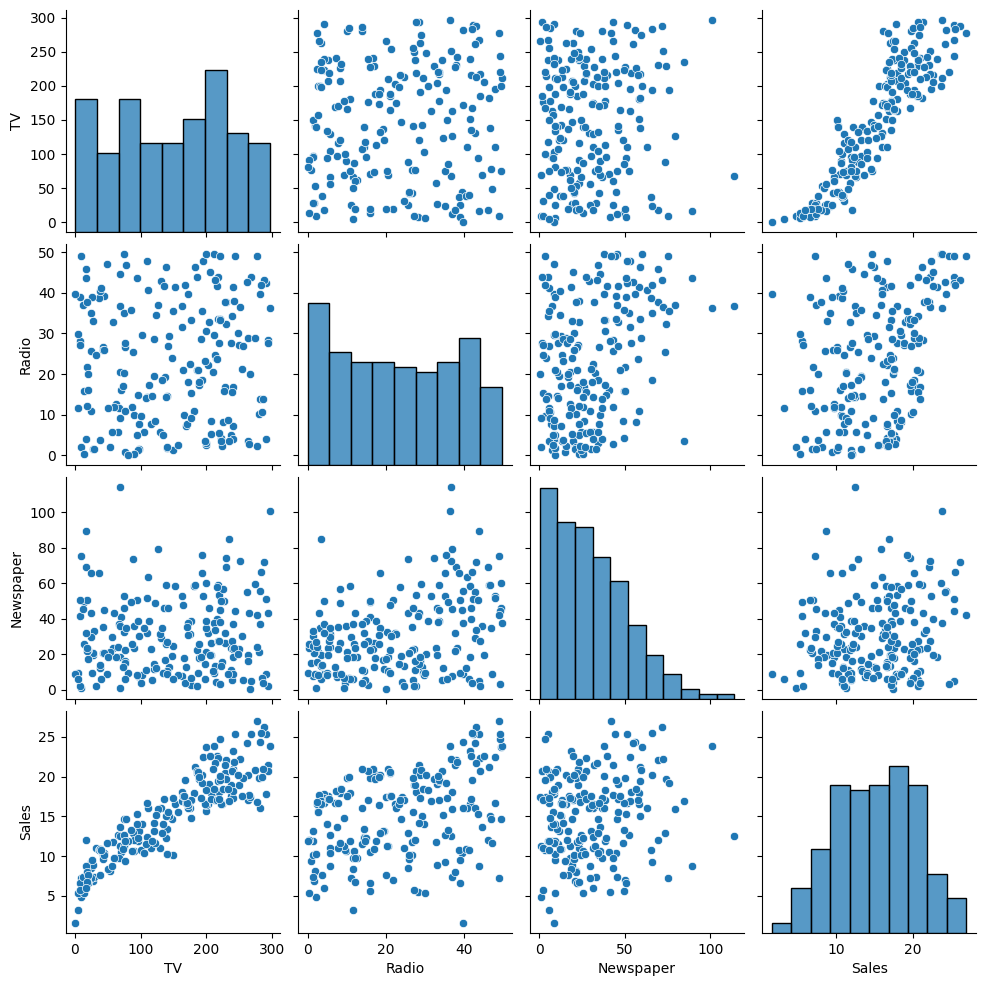

In [ ]:
# Pairplot for visualizing relationships between variables
sns.pairplot(data)
plt.show()

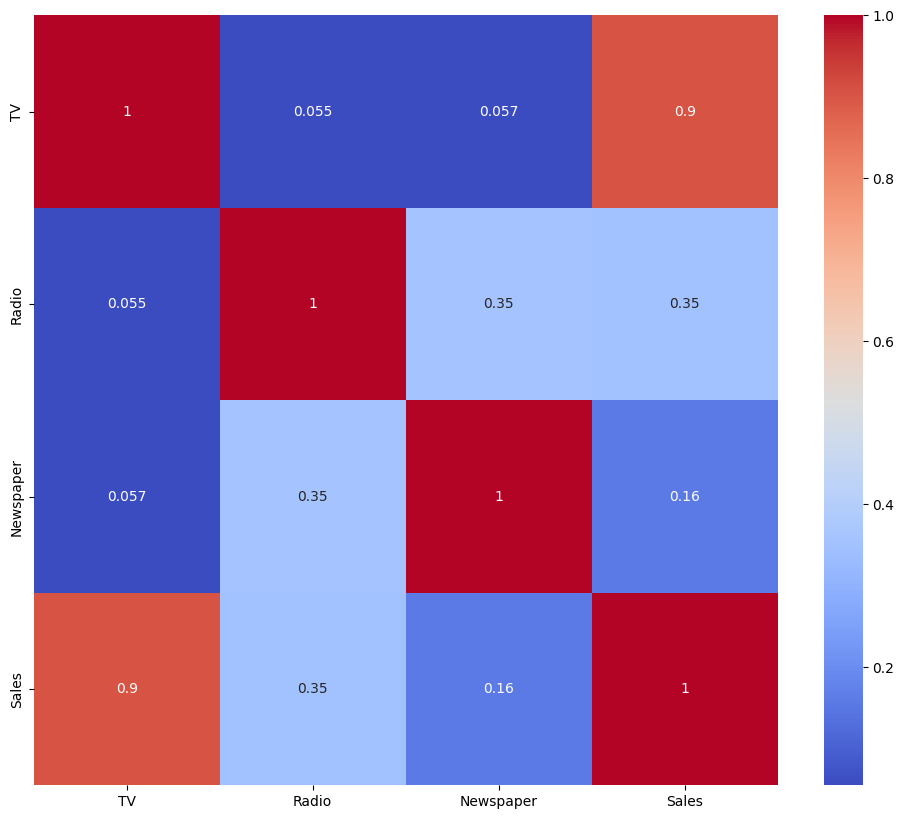

In [ ]:
# Correlation heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

### **Calculating Average Sales:**

**To calculate the average sales from your dataset, you can simply use the mean() function on the 'Sales' column:**

In [ ]:
average_sales = data['Sales'].mean()
print("Average Sales:", average_sales)

Average Sales: 15.130500000000001


### **Histogram of Sales:**

**Visualize the distribution of sales values using a histogram.**

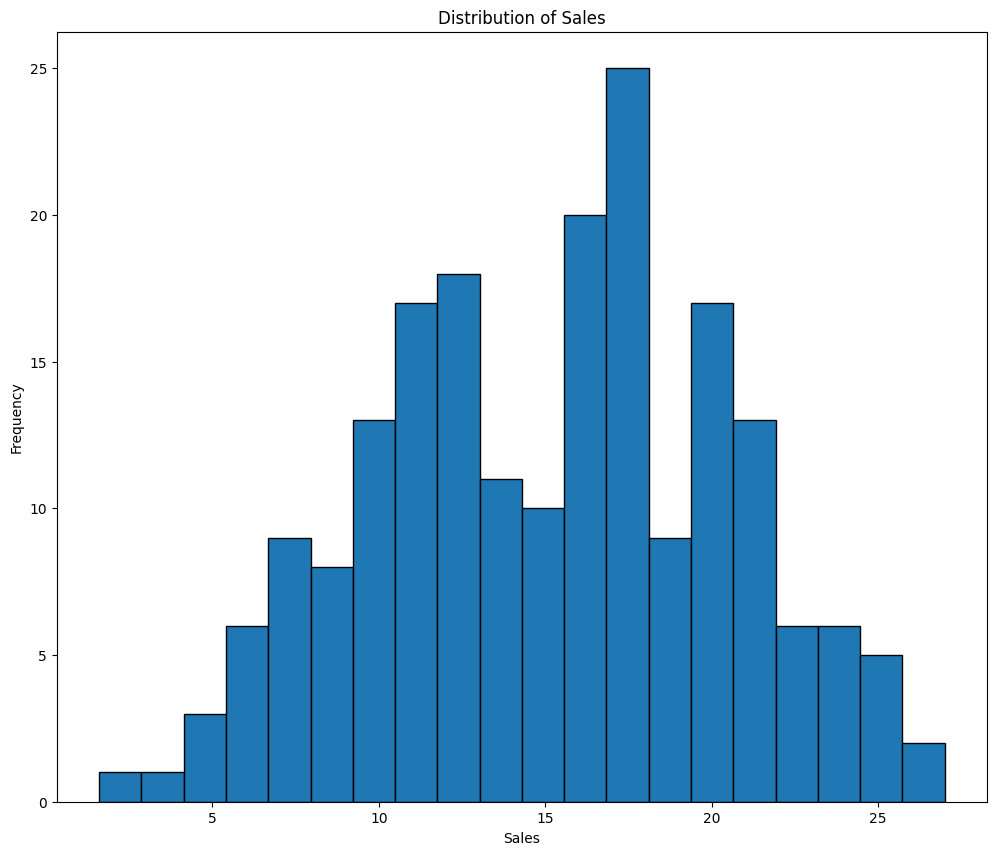

In [ ]:
plt.hist(data['Sales'], bins = 20, edgecolor = 'k')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

### **Scatter Plots for Individual Advertising Channels:**

**Create scatter plots to see the relationship between each advertising channel (TV, Radio, Newspaper) and sales.**

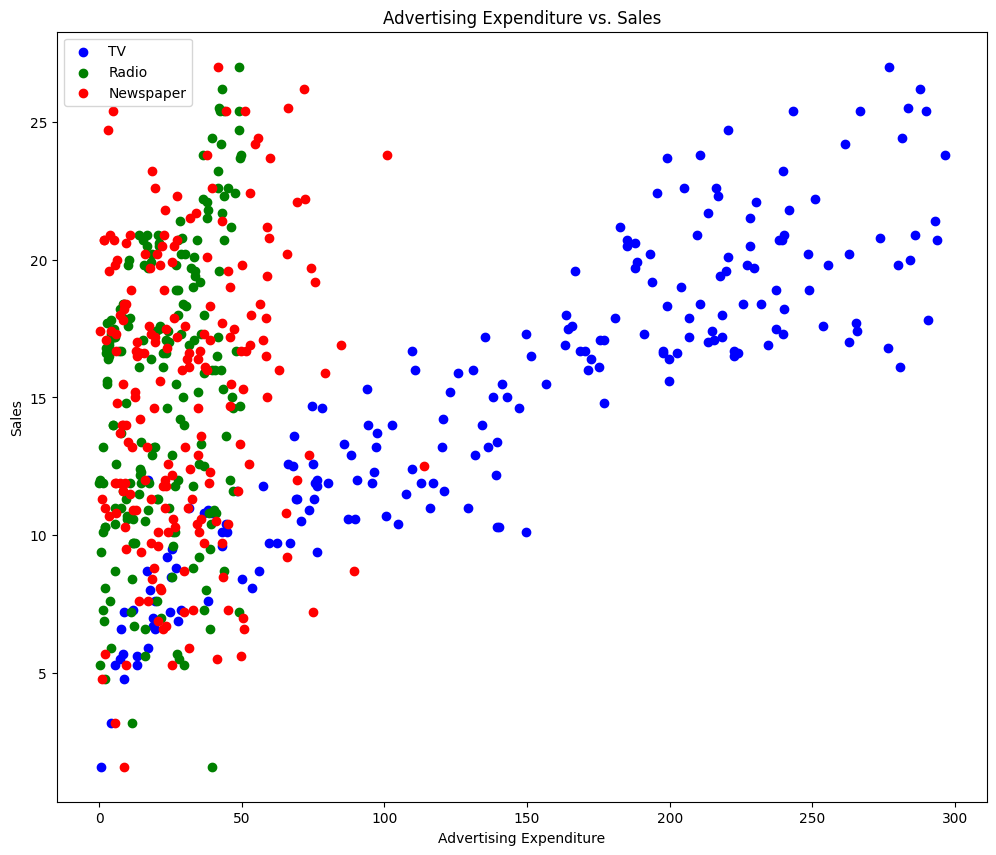

In [ ]:
plt.scatter(data['TV'], data['Sales'], c = 'blue', label = 'TV')
plt.scatter(data['Radio'], data['Sales'], c = 'green', label = 'Radio')
plt.scatter(data['Newspaper'], data['Sales'], c = 'red', label = 'Newspaper')
plt.xlabel('Advertising Expenditure')
plt.ylabel('Sales')
plt.legend()
plt.title('Advertising Expenditure vs. Sales')
plt.show()

**Box Plot for Sales:**

**Create a box plot to visualize the distribution of sales and identify potential outliers.**

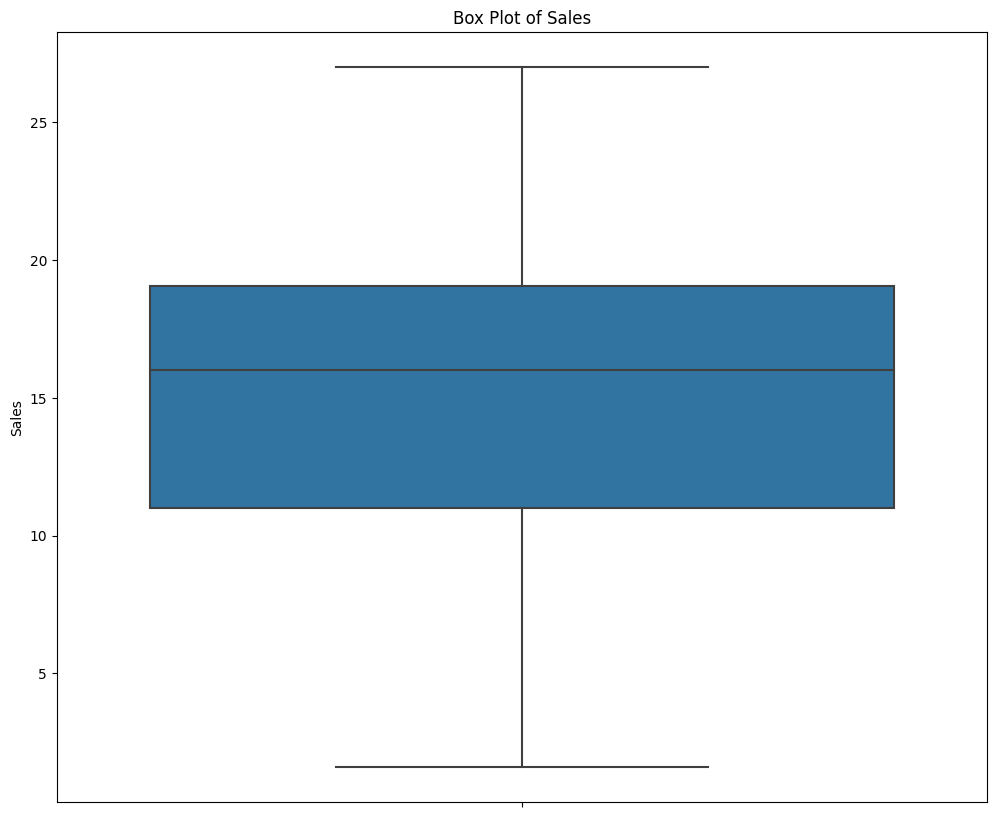

In [ ]:
sns.boxplot(y = data['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()

**Descriptive Statistics: You calculate and print summary statistics for the 'Sales' column, including measures like mean, standard deviation, minimum, maximum, and quartiles.**

**Outlier Detection: You use the interquartile range (IQR) method to detect potential outliers. Any data points falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers. These outliers are printed at the end.**

In [ ]:
# Descriptive statistics
summary_stats = data['Sales'].describe()

# Detect and print potential outliers
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]

print("Summary Statistics for Sales:")
print(summary_stats)
print("\nPotential Outliers:")
print(outliers)

Summary Statistics for Sales:
count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

Potential Outliers:
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


### **Feature Selection**

**Based on the EDA, select the relevant features (independent variables) for the prediction. In this case, it appears that TV, Radio, and Newspaper advertising expenditures are relevant for predicting sales.**

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

### **Split Data into Training and Testing Sets**

**Split the data into training and testing sets to train and evaluate the model.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Model Training**

**Train a linear regression model on the training data:**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Model Evaluation**

**Evaluate the model's performance on the test data:**

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


### **Make Predictions**

In [ ]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 19.740528001816998


### **Inference**

**Based on the output and visualizations, you can draw the following inferences:**

**TV advertising expenditure has a strong positive correlation with sales. Radio advertising expenditure also has a positive correlation with sales but weaker than TV. Newspaper advertising expenditure has a relatively weak positive correlation with sales.**